# Regression Problems in Machine Learning

Machine Learning is a branch of Artificial Intelligence that enables computer programs to automatically learn and improve from experience.

Machine Learning algorithms learn from datasets and then based on the patterns identified from the datasets make predictions on unseen data.

ML algortihms can be broadly categorized into two types:

Supervised Learning

Unsupervised Learning

Supervised ML algorithms are those algorithms where the input dataset and the corresponding output or true prediction is available and the algorithms try to find the relationship between inputs and outputs.

In unsupervised ML algorithms, he tru labels for the outputs are not known. Rather, the algorithms try to find similar patterns in the data. E.g. Clustering.

Supervised learning algorithms are further divided into two types:

Regression Algorithms

Classification Algorithms

Regression algorithms predict a continuous value for example, the price of a house.

Classification algorithms predict a discrete value e.g. whether a incoming email is Spam/Ham

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.get_dataset_names()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Importing the dataset and printing the dataset header

In [12]:
tips_df= sns.load_dataset("tips")

tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We will be using machine learning algorithm to predict the tip for a particlualar record based on the remaining features such as total_bill, gender, day, time etc.

Dividing Data into Features and Labels

In [13]:
X=tips_df.drop(['tip'],axis=1)

y=tips_df["tip"]

In [14]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


In [18]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

Converting Categorical Data to Numbers

ML Algorithms can only work with numbers. It is important to convert categorical data into a numeric format

Numeric Variables

In [19]:
numerical= X.drop(['sex','smoker','day','time'],axis=1)

numerical.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


DataFrame that contains only categorical columns

In [20]:
categorical= X.filter(['sex','smoker','day','time'])

categorical.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [21]:
categorical["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

One of the most common approaches to convert a categorical column to a numeric one is via one-hot encoding.

In one-hot encoding, for every unique valie in the origial columns, a new column is created.

In [22]:
cat_numerical= pd.get_dummies(categorical)

cat_numerical.head()

,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,0,1,0,1,0,0,0,1,0,1
1,1,0,0,1,0,0,0,1,0,1
2,1,0,0,1,0,0,0,1,0,1
3,1,0,0,1,0,0,0,1,0,1
4,0,1,0,1,0,0,0,1,0,1


The final step is to join the numerical columns with the one-hot encoded columns.

In [23]:
X= pd.concat([numerical, cat_numerical],axis=1)

X.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,2,0,1,0,1,0,0,0,1,0,1
1,10.34,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3,1,0,0,1,0,0,0,1,0,1
3,23.68,2,1,0,0,1,0,0,0,1,0,1
4,24.59,4,0,1,0,1,0,0,0,1,0,1


Divide Data into Training and Test Sets

We divide the dataset into two sets i.e. train and test set.

The dataset is trained via the train set and evaluated on the test set.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.20, random_state=0)

In [27]:
X_train.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
7,26.88,4,1,0,0,1,0,0,0,1,0,1
83,32.68,2,1,0,1,0,1,0,0,0,1,0
176,17.89,2,1,0,1,0,0,0,0,1,0,1
106,20.49,2,1,0,1,0,0,0,1,0,0,1
156,48.17,6,1,0,0,1,0,0,0,1,0,1


In [28]:
y_train.head()

7      3.12
83     5.00
176    2.00
106    4.06
156    5.00
Name: tip, dtype: float64

In [29]:
X_test.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
64,17.59,3,1,0,0,1,0,0,1,0,0,1
63,18.29,4,1,0,1,0,0,0,1,0,0,1
55,19.49,2,1,0,0,1,0,0,0,1,0,1
111,7.25,1,0,1,0,1,0,0,1,0,0,1
225,16.27,2,0,1,1,0,0,1,0,0,1,0


In [31]:
y_test.head()

64     2.64
63     3.76
55     3.51
111    1.00
225    2.50
Name: tip, dtype: float64

Data Scaling/Normalization

The final step before data is passed to ML algorithm is to scale the data.

Some columns of the dataset contain small values, while the others contain very large values. It is better to convert all alues to a uniform scale.

In [33]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

We have converted data into a format that can be used to train ML algorithms for regression.

Linear Regression

Linear Regresion is alinear model that assumes a linear relationship between inputs and outputs and minimizes the cost of error between the predicted and actual output using functions like mean absolute error.

Advantages

Linear Regression is a simple to implement and easily interpretable algorithm.

It takes less time to train, even for huge datasets.

Linear Regression coefficients are easy to interpret.

Importing linear regression model from sklearn

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lin_reg= LinearRegression()

regressor= lin_reg.fit(X_train, y_train)

y_pred=regressor.predict(X_test)

Once you have trained a model and have made predictions on the test set, the next step is to know how well
your model has performed for making predictions on the unknown test set.

There are various metrics to check that.

Mean Absolute Error(MAE) is calculated by taking the average of absolute error obtained by subtracting real values from predicted values.

Mean Squared Error(MSE) is similar to MAE. However, the error for each record is squared in case of MSE

Root Mean Squared Error(RMSE) is the under the root of mean squared error

In [37]:
from sklearn import metrics

print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.7080218832979825
Mean Squared Error:  0.8939195221609605
Root Mean Squared Error:  0.9454731736865729


By looking at the MAE, it can be concluded that, on average there is an error of 0.70 for predictions, which means that on average there is an error of 0.70 for predictions, which means that on average, the predicted tip values are 0.70$ more or less than the actual tip values.

# Random Forest Regression

Random Forest is tree-based algorithm.

Ensemble modelling technique

Advantages

You have lots of missing data or imbalance dataset(0(200) and 1(1000)).

With a large number of trees or models, you can avoid overfitting. Overfitting occurs when ML models performs better on the training set but worse on the test set.

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf_reg= RandomForestRegressor(random_state=42, n_estimators=500)

regressor=rf_reg.fit(X_train, y_train)

y_pred= regressor.predict(X_test)

In [39]:
from sklearn import metrics

print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.6977134693877551
Mean Squared Error:  0.7840190285387771
Root Mean Squared Error:  0.8854484900539258


# Clasification Problems in Machine Learning

Classification problems are the type of problems where you have to predict a discrete value i.e. whether the student will pass the exam or not.

In [42]:
import pandas as pd
import numpy as np

Importing the dataset

In [43]:
churn_df=pd.read_csv("Churn_Modelling.csv")

churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The exited column contains information regarding whether or not the customer exited the bank after six months.



Removing unnecessary columns

In [44]:
churn_df= churn_df.drop(['RowNumber','CustomerId','Surname'],axis=1)

churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Dividing Data into Features and Labels

In [45]:
X=churn_df.drop(['Exited'],axis=1)

y=churn_df['Exited']

In [46]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [47]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Converting Categorical Data to Numbers

In [48]:
numerical= X.drop(['Geography','Gender'],axis=1)

numerical.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [49]:
categorical= X.filter(['Geography','Gender'])

categorical.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [53]:
cat_numerical=pd.get_dummies(categorical)

cat_numerical.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0


In [51]:
X=pd.concat([numerical, cat_numerical],axis=1)

X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


Dividing Data into Training and test Sets

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.20, random_state=0)

Data Scaling/Normalization

In [54]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train=sc.fit_transform(X_train)

X_test= sc.transform(X_test)

Binary Classification problems are those classification problems where there are only two possible values fro the output label.

Whether a customer will leave the bank after a certain period or not.

Logistic Regression

Logistic Regression is a linear model, which makes classification by passing the output of linear regression through a sigmoid function.

Importing logistic regression classifier from sklearn

In [55]:
from sklearn.linear_model import LogisticRegression

log_clf= LogisticRegression()

classifier= log_clf.fit(X_train, y_train)

y_pred= classifier.predict(X_test)

There are various metrics to evaluate a classification method.

Some of the most commonly used classification metrics are F1 score, recall, precision, accuracy and confusion matrix.

True Negatives:(TN/tn) True negatives are those output labels thatare actually false and the model also predicted them as false

True Positive:(TP/tp) True positives are those labels that are actually true and also predicted as true by the model

False Negatove:(FP/fp) False Negatives are labels that are actually true but model predicted as false

False Positve:(FP/fp) False Positivesare labels that are actually false but predicted as true by the model

Precision

It is obtained y dividing true positives by the sum of true positive and false positive

Precision= tp/(tp+fp)

Recall

It is calculated by dividing true positives by the sum of true positives and false negative

Recall= tp/(tp+fn)

Evaluating the algorithm on the test set

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

[[1526   69]
 [ 309   96]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000

0.811


Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(random_state=42, n_estimators=500)

classifier= rf_clf.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

[[1530   65]
 [ 198  207]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.76      0.51      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000

0.8685


# Clustering

Clustering algorithms are unsupervised alorithms where the training data is not labeled.

Rather, the algorithms cluster or group the datasets based on common characteristics.

K-Means Clustering

K-Means clustering is one of the most commonly used algorithms for clustering, K refers to the number of clusters that you want your data to be grouped into.

In K-Means clustering, the number of clusters has to be defined before K clustering can be applied to the data points.

Steps for K-Means Clustering

Randomly assign centroid values for each cluster

Calculate the euclidean distance between each data point and centroid values of all the clusters.

Assign the data point to the cluster of the centroid with the shortest distance

Calculate and update centroid values based on the mean values of the coordinates of all the data points of the corresponding cluster.

Repeat steps 2-4 until new centroid values for all the clusters are different from the previous centroid values.

In [59]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Customer Segmentation using K-Means Clustering

In this project you will see how to segment customers based on their incomes and past spending habits.

You will then identify customers who have high incomes and higher spending.

In [60]:
dataset= pd.read_csv("Mall_Customers.csv")

dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [62]:
dataset.shape

(200, 5)

The output shows that the dataset contains 200 records and 5 columns.

Plotting the histogram for the annual income column

<AxesSubplot:xlabel='Annual Income (k$)'>

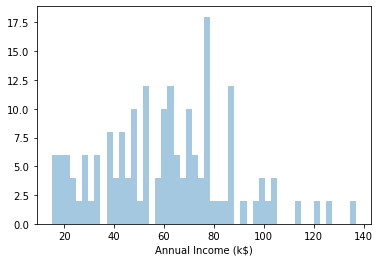

In [63]:
import warnings
warnings.filterwarnings("ignore")

sns.distplot(dataset["Annual Income (k$)"],kde=False,bins=50)

The output shows that most of the customers have incomes between 60 and 90K per year.

Plotting the histogram for the spending score column

<AxesSubplot:xlabel='Spending Score (1-100)'>

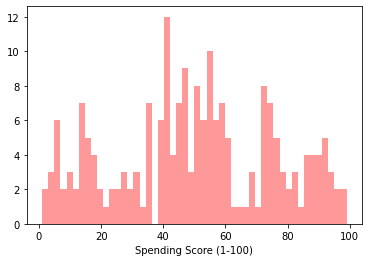

In [64]:
sns.distplot(dataset["Spending Score (1-100)"],kde=False,bins=50,color="red")

The output shows that most of the customers have a spending score betwen 40 and 60

Plotting regression plot for annual income against spending score

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

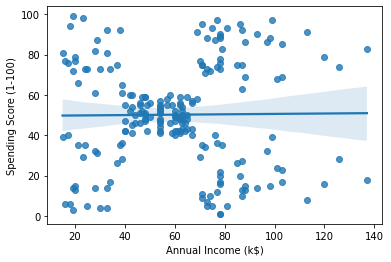

In [65]:
sns.regplot(x="Annual Income (k$)", y="Spending Score (1-100)",data=dataset)

There is no linear relationship between annual income and spending

Plotting regression plot for age and spending score

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

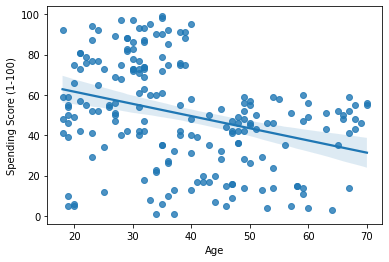

In [66]:
sns.regplot(x="Age", y="Spending Score (1-100)",data=dataset)

The output confirms an inverse linear relationship between age and spending score.

Young people have higher spending compared to older people.

In [67]:
dataset=dataset.filter(["Annual Income (k$)","Spending Score (1-100)"],axis=1)

dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [68]:
km_model=KMeans(n_clusters=4)
km_model.fit(dataset)

KMeans(n_clusters=4)

In [69]:
print(km_model.cluster_centers_)

[[26.30434783 20.91304348]
 [48.26       56.48      ]
 [87.         18.63157895]
 [86.53846154 82.12820513]]


In [70]:
print(km_model.labels_)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


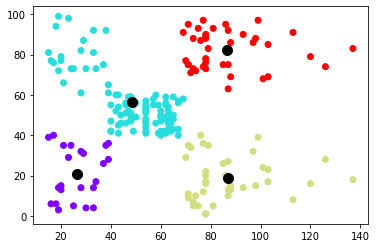

In [71]:
plt.scatter(dataset.values[:,0],dataset.values[:,1],c=km_model.labels_,cmap='rainbow')
plt.scatter(km_model.cluster_centers_[:,0],km_model.cluster_centers_[:,1],s=100,c='black')

Elbow method to get the optimal number of clusters

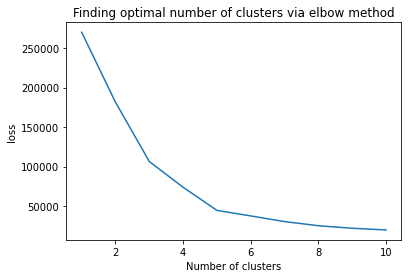

In [72]:
loss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i).fit(dataset)
    loss.append(km.inertia_)

plt.plot(range(1,11),loss)
plt.title('Finding optimal number of clusters via elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('loss')
plt.show()

In [73]:
km_model=KMeans(n_clusters=5)
km_model.fit(dataset)

KMeans(n_clusters=5)

In [74]:
print(km_model.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [88.2        17.11428571]]


In [75]:
print(km_model.labels_)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 0 1 4 1 4 1 0 1 4 1 4 1 4 1 4 1 0 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


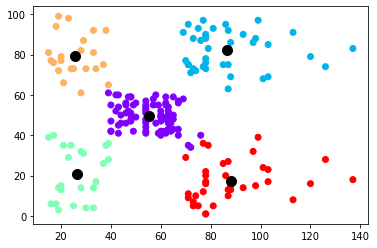

In [76]:
plt.scatter(dataset.values[:,0],dataset.values[:,1],c=km_model.labels_,cmap='rainbow')
plt.scatter(km_model.cluster_centers_[:,0],km_model.cluster_centers_[:,1],s=100,c='black')

Filtering all records with cluster id 1

In [77]:
cluster_map= pd.DataFrame()

cluster_map['data_indx']=dataset.index.values

cluster_map['cluster']=km_model.labels_

cluster_map

,data_indx,cluster
0,0,2
1,1,3
2,2,2
3,3,3
4,4,2
...,...,...
195,195,1
196,196,4
197,197,1
198,198,4


In [78]:
cluster_map= cluster_map[cluster_map.cluster==1]

cluster_map.head()

,data_indx,cluster
123,123,1
125,125,1
127,127,1
129,129,1
131,131,1


These are the customers who have high incomes and high spending and these customers should be targeted during marketing campaigns.

# Dimensionality Reduction with PCA(Principal Component Analysis)

Dimensionality reduction refers to reducing the number of features in a dataset in such a way that the overall performance of the algorithms trained on the dataset is minimally affected.

With dimensionality reduction, the training time of the statistical algorithmcan significantly be reduced and data can be visualised more easily.

There are three main approaches used for dimensionality reduction: Princiapl Component Analysis(PCA), Linear Discriminant Analysis(LDA) and Singular Value Decomposition(SVD)

Principal Component Analysis

PCA is an unsupervised dimensionality reduction technique that doesn't depend on the labels of a dataset.

PCA prioritizes features on the basis of their abiliy to cause maximum variance in the output.

The idea behind PCA is to capture those features that contain maximum variance about the dataset.

The feature that causes maximum variance in the output is called the first principal component and the feature that causes the second highest variance is called the second principal component.

Advantages of PCA

Correlated features can be detected and removed using PCA

It reduces overfitting because of a reduction in the number of features

Model training can be expedited.

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns

In [80]:
iris_df=sns.load_dataset("iris")

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [81]:
X=iris_df.drop(['species'],axis=1)

y=iris_df['species']

from sklearn import preprocessing

le=preprocessing.LabelEncoder()

y=le.fit_transform(y)    

Before we apply PCA on a dataset, we will divide it into the training and test sets.

In [82]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=0)

In [83]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [84]:
from sklearn.decomposition import PCA

pca=PCA()

X_train=pca.fit_transform(X_train)

X_test=pca.transform(X_test)

In [85]:
variance_ratios=pca.explained_variance_ratio_
print(variance_ratios)

[0.72229951 0.2397406  0.03335483 0.00460506]


The output above shows that 72.22 percent of the variance in the dataset is caused by the first princiapl component, while 23.97 percent of the variance is caused by the second principal component.

In [86]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)